In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('insurance.csv')

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Cleaning

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Feature Engineering

In [14]:
Male = pd.get_dummies(df['sex'], drop_first = True)
df = pd.concat([df, Male], axis =1)

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [16]:
Smoker = pd.get_dummies(df['smoker'], drop_first = True)
df = pd.concat([df, Smoker], axis =1)

In [17]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [18]:
df = df.rename(columns = {'yes':'Smoker'})

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [20]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Exploratory Analysis

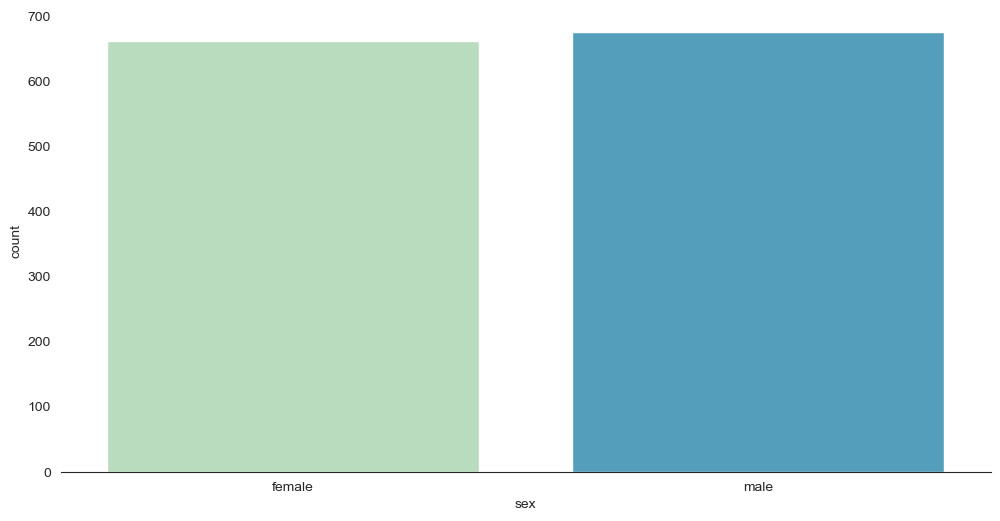

In [21]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.countplot(x='sex', data= df, palette = 'GnBu')
sns.despine(left = True)

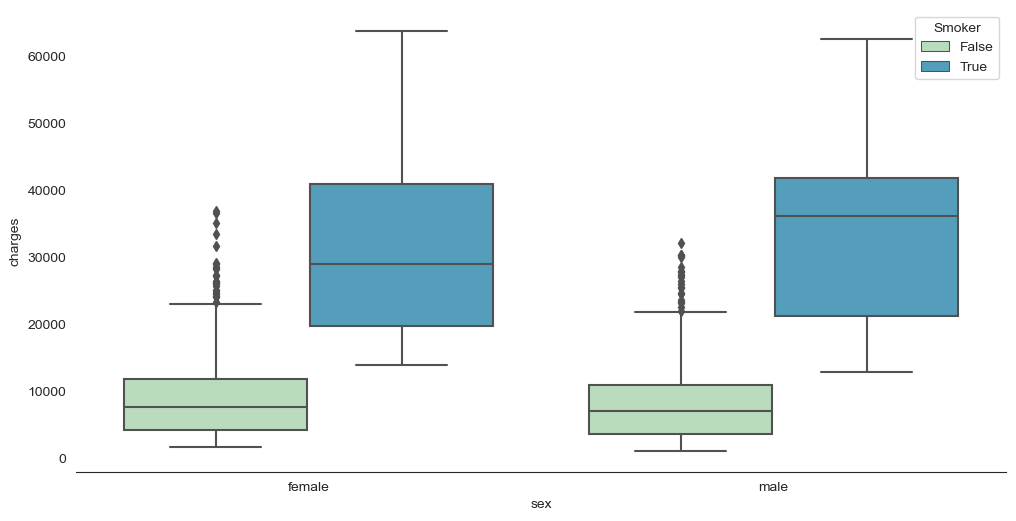

In [22]:
plt.figure(figsize = (12,6))
sns.set_style('white')
sns.boxplot(x='sex', y= 'charges', data = df, palette ='GnBu', hue = 'Smoker')
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

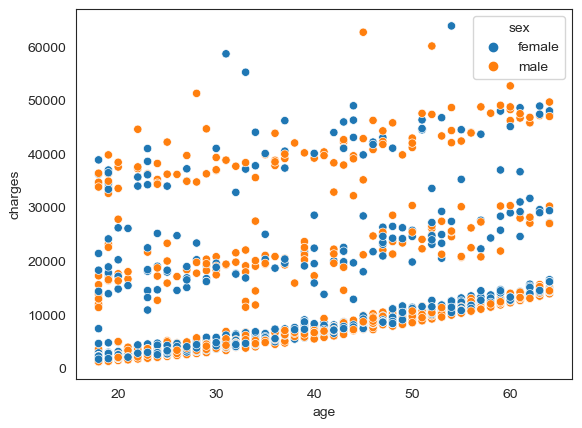

In [23]:

sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'sex')

<Axes: xlabel='age', ylabel='charges'>

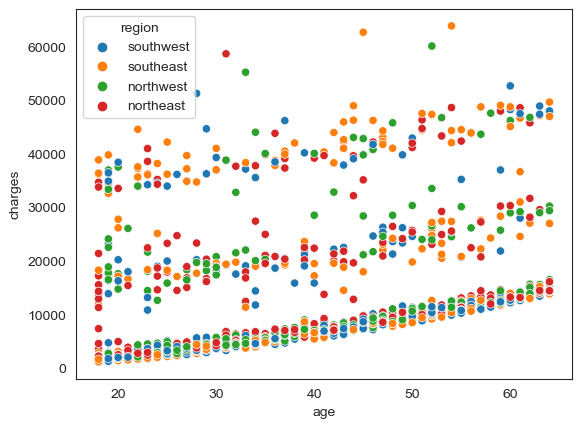

In [24]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'region')

<Axes: xlabel='age', ylabel='charges'>

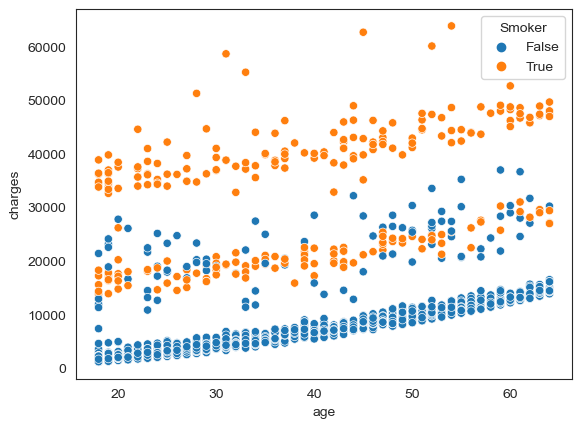

In [25]:
sns.scatterplot(x = 'age', y = 'charges', data =df, hue= 'Smoker')

<Axes: xlabel='bmi', ylabel='charges'>

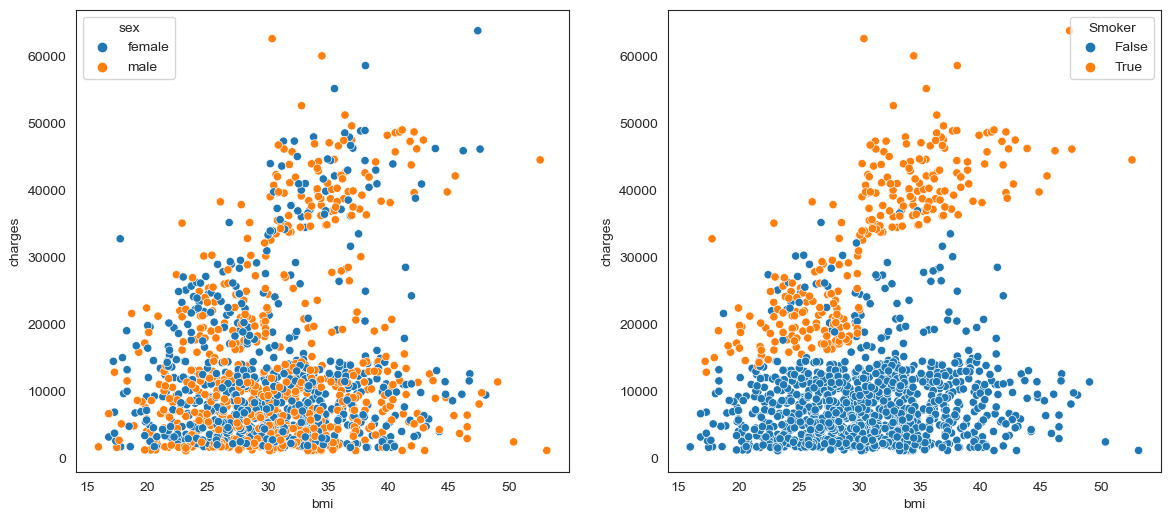

In [26]:
fig, ax = plt.subplots(nrows= 1, ncols = 2, figsize= (14,6))
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'sex', ax= ax[0])
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker', ax = ax[1])

<Axes: xlabel='bmi', ylabel='charges'>

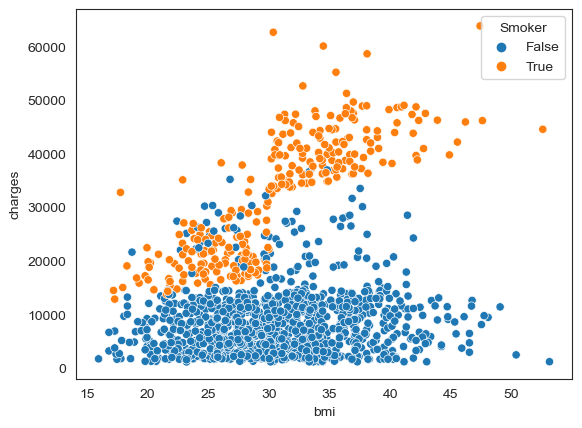

In [27]:
sns.scatterplot(x = 'bmi', y = 'charges', data =df, hue= 'Smoker')

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [29]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

<Axes: >

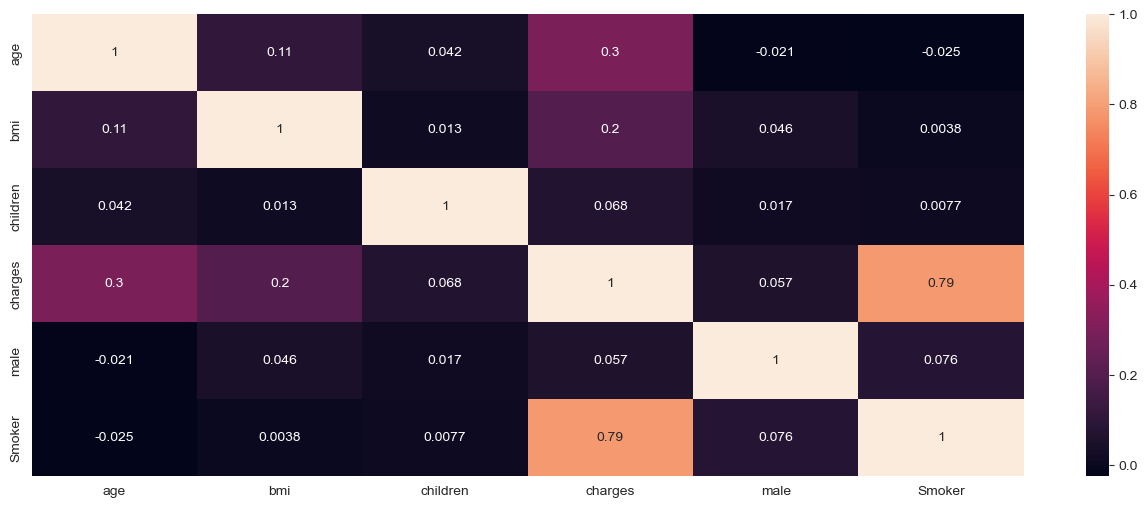

In [30]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot = True)

# Splitting the data

In [31]:
x = df.drop('charges', axis = 1)
y = df['charges']

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4)

In [33]:
x_train.shape

(802, 5)

In [34]:
df.head()

,age,bmi,children,charges,male,Smoker
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False


In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [37]:
scaled_x_train

array([[-1.30555469, -2.14378342, -0.05243083, -1.01507623, -0.52444232],
       [ 0.26627792, -0.1137945 , -0.05243083,  0.98514769, -0.52444232],
       [ 1.05219423, -1.56675507,  0.77206968,  0.98514769, -0.52444232],
       ...,
       [-1.44844856,  2.24866505, -0.87693134,  0.98514769,  1.90678739],
       [ 1.26653504, -0.29361635, -0.87693134,  0.98514769,  1.90678739],
       [-1.44844856,  0.98191999, -0.87693134,  0.98514769,  1.90678739]])

# Support vector regression

In [38]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(scaled_x_train, y_train)

predict = regressor.predict(scaled_x_test)

In [39]:
predict

array([9452.71629208, 9468.08138589, 9470.05830348, 9574.75688245,
       9477.10101378, 9453.6301072 , 9585.80363533, 9483.2414706 ,
       9565.76363099, 9531.80528425, 9463.02268086, 9598.59583514,
       9528.49682016, 9462.44286386, 9485.07754695, 9518.26752266,
       9605.75817083, 9467.28658248, 9561.00266385, 9505.94170094,
       9567.83134511, 9454.09343992, 9561.42294201, 9561.57439865,
       9542.77557625, 9480.97954785, 9557.67292914, 9477.08547434,
       9480.93444114, 9552.31395819, 9514.63229596, 9458.58763066,
       9528.71233787, 9447.36884882, 9511.21076872, 9579.33683294,
       9483.67204398, 9606.44125426, 9513.98847959, 9494.22957818,
       9486.30366293, 9585.63816537, 9499.37734986, 9550.94063288,
       9515.15844379, 9591.26015672, 9471.05774392, 9535.89559635,
       9503.63785329, 9458.94807916, 9503.95430579, 9565.61825753,
       9523.65816271, 9482.51661734, 9450.77100893, 9563.45103087,
       9494.89887145, 9555.17034669, 9445.26852453, 9552.92318

In [40]:
y_test

525     11482.63485
507      3077.09550
354     14133.03775
379     27000.98473
1251     1241.56500
           ...     
704      8930.93455
243      7196.86700
490      1748.77400
857     15817.98570
851     14119.62000
Name: charges, Length: 536, dtype: float64

In [41]:
np.mean((y_test - predict)**2)

132917530.19883978

Text(0.5, 0, 'Predict')

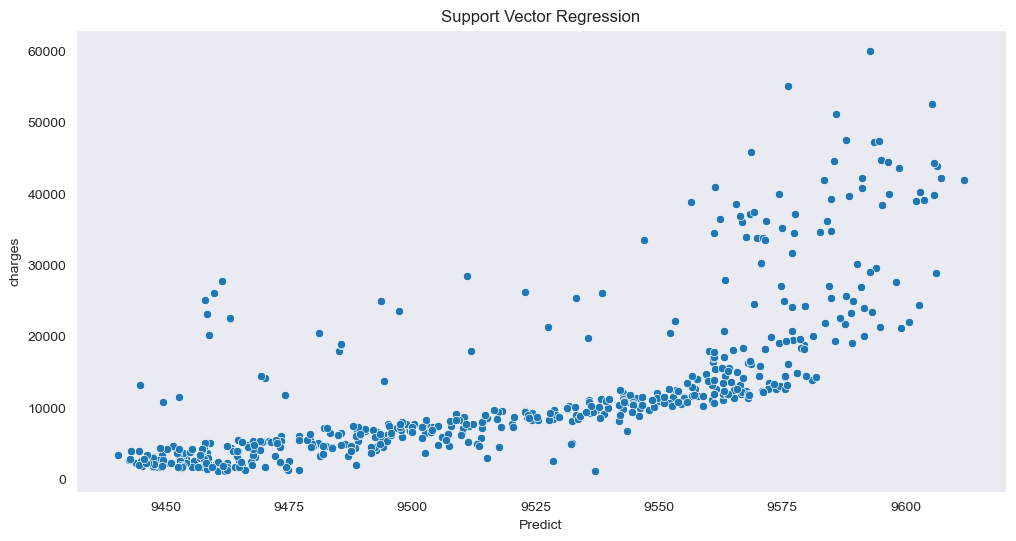

In [51]:
plt.figure(figsize=(12, 6))
sns.set_style('dark')
f = sns.scatterplot(x=predict, y=y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')
